In [2]:
!pip install ultralytics
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


In [ ]:

    
    import os, cv2, yaml, random, numpy as np
    from PIL import Image
    from glob import glob
    from matplotlib import pyplot as plt
    from torchvision import transforms as T
    root = "/kaggle/input/smoke-fire-detection-yolo"

    
    yml_file_path = f"{root}/data.yaml"
    
    with open(yml_file_path, 'r') as file: 
        data = yaml.safe_load(file)
    
    # Update the paths
    data['train'] = f'{root}/data/train'
    data['val']   = f'{root}/data/val'
    data['test']  = f'{root}/data/test'
    

    output_path = '/kaggle/working/updated_config.yaml'
    with open(output_path, 'w') as file: 
        yaml.dump(data, file, default_flow_style=False)

In [ ]:
train_results2 = model.train(    
    data=output_path,
    epochs=50, 
    patience=5, 
    batch=32, 
    imgsz=640,
    device=0,
    workers=4,
    optimizer= 'AdamW', 
    seed=42,
)  


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/updated_config.yaml, epochs=50, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 28.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/smoke-fire-detection-yolo/data/train/labels... 14101 images, 6457 backgrounds, 21 corrupt: 100%|██████████| 14122/14122 [00:49<00:00, 283.10it/s]

train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02521.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02521.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06626.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06626.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07199.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07199.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07271.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07271.jpg'
train: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07278.jpg: ig

train: WARNING ⚠️ Cache directory /kaggle/input/smoke-fire-detection-yolo/data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/smoke-fire-detection-yolo/data/val/labels... 3094 images, 1375 backgrounds, 5 corrupt: 100%|██████████| 3099/3099 [00:11<00:00, 280.16it/s]

val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07535.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07535.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07536.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07536.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07539.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07539.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07542.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07542.jpg'
val: WARNING ⚠️ /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07561.jpg: ignoring corrupt image/label: 

val: WARNING ⚠️ Cache directory /kaggle/input/smoke-fire-detection-yolo/data/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.34G      1.827      4.124      1.589         47        640: 100%|██████████| 441/441 [02:49<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]


                   all       3094       3917      0.317      0.437      0.292      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.86G      1.803      3.556      1.561         70        640: 100%|██████████| 441/441 [02:44<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.75it/s]


                   all       3094       3917      0.511       0.45      0.448      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.86G      1.781      3.435      1.549         41        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.60it/s]


                   all       3094       3917      0.482      0.369      0.359      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.86G       1.76        3.3      1.522         40        640: 100%|██████████| 441/441 [02:42<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.75it/s]


                   all       3094       3917      0.453      0.438      0.405      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.86G      1.732      3.186      1.507         44        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.70it/s]


                   all       3094       3917       0.49       0.41      0.386       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.86G      1.692      3.081      1.485         52        640: 100%|██████████| 441/441 [02:41<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.66it/s]


                   all       3094       3917      0.609       0.53      0.567      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.86G      1.671       2.99      1.473         65        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.73it/s]


                   all       3094       3917      0.625      0.547      0.591      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.86G      1.648       2.89      1.453         45        640: 100%|██████████| 441/441 [02:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.72it/s]


                   all       3094       3917      0.607      0.573      0.596      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.86G      1.641      2.864       1.45         31        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.71it/s]


                   all       3094       3917      0.616      0.537      0.588      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.86G       1.62      2.781      1.433         44        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.74it/s]


                   all       3094       3917      0.665      0.592      0.644      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.86G      1.613      2.742      1.422         45        640: 100%|██████████| 441/441 [02:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.77it/s]


                   all       3094       3917      0.671      0.586      0.641      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.86G      1.597      2.714      1.424         55        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.65it/s]


                   all       3094       3917      0.676      0.588      0.648      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.86G      1.586      2.684      1.409         51        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.81it/s]


                   all       3094       3917      0.668      0.592      0.646      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.86G      1.575      2.633      1.403         60        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.66it/s]


                   all       3094       3917      0.638      0.557      0.603      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.86G      1.566      2.593      1.394         53        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.80it/s]


                   all       3094       3917      0.672      0.589      0.632       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.86G      1.555      2.563      1.388         25        640: 100%|██████████| 441/441 [02:42<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.72it/s]


                   all       3094       3917      0.715      0.627      0.692      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.86G      1.551      2.538      1.388         28        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.82it/s]


                   all       3094       3917      0.705      0.632      0.692      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.86G       1.53      2.485      1.366         72        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.86it/s]


                   all       3094       3917      0.722      0.634      0.705      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.86G      1.525      2.464      1.366         55        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.67it/s]


                   all       3094       3917      0.686      0.578      0.632      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.86G      1.527      2.442       1.37         54        640: 100%|██████████| 441/441 [02:41<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.78it/s]


                   all       3094       3917      0.734      0.638      0.715      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.86G      1.516      2.394      1.366         35        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.77it/s]


                   all       3094       3917      0.732      0.637      0.709      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.86G      1.497      2.356      1.352         44        640: 100%|██████████| 441/441 [02:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.86it/s]

                   all       3094       3917      0.706      0.632      0.698      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.86G      1.491      2.352      1.347         54        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.81it/s]


                   all       3094       3917      0.726      0.645      0.722      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.86G      1.485      2.319      1.338         80        640: 100%|██████████| 441/441 [02:42<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.65it/s]


                   all       3094       3917      0.725       0.66      0.733      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.86G      1.478       2.29      1.335         65        640: 100%|██████████| 441/441 [02:41<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.83it/s]


                   all       3094       3917       0.73      0.671      0.738      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.86G      1.467      2.262      1.331         73        640: 100%|██████████| 441/441 [02:41<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.71it/s]


                   all       3094       3917      0.732      0.665      0.737       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.86G      1.464      2.252       1.33         30        640: 100%|██████████| 441/441 [02:44<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.78it/s]


                   all       3094       3917      0.735      0.678      0.741      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.86G      1.447      2.223      1.317         62        640: 100%|██████████| 441/441 [02:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.75it/s]


                   all       3094       3917       0.74      0.669      0.741      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.86G      1.449      2.187      1.317         48        640: 100%|██████████| 441/441 [02:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.80it/s]


                   all       3094       3917      0.751      0.674       0.75      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.86G      1.433      2.152      1.313         46        640: 100%|██████████| 441/441 [02:43<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.90it/s]


                   all       3094       3917       0.76      0.675      0.756      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.86G      1.437       2.13        1.3         45        640: 100%|██████████| 441/441 [02:42<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.51it/s]

                   all       3094       3917      0.746      0.684      0.759      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.86G      1.421      2.113        1.3         36        640: 100%|██████████| 441/441 [02:43<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.86it/s]


                   all       3094       3917      0.759      0.678      0.758      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.86G       1.41      2.071      1.289         70        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.86it/s]

                   all       3094       3917      0.748      0.691       0.76      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.86G      1.404      2.063      1.289         42        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.72it/s]


                   all       3094       3917      0.756      0.688      0.764      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.86G      1.402      2.039      1.281         44        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.80it/s]

                   all       3094       3917      0.758      0.687       0.76      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.86G      1.395      2.002      1.278         69        640: 100%|██████████| 441/441 [02:43<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.77it/s]

                   all       3094       3917      0.766      0.687      0.765      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.86G      1.382      1.993      1.278         47        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.95it/s]

                   all       3094       3917      0.751      0.706      0.768      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.86G      1.382      1.976      1.274         43        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.78it/s]


                   all       3094       3917      0.761      0.692      0.765      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.86G      1.369      1.929      1.266         69        640: 100%|██████████| 441/441 [02:42<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.77it/s]

                   all       3094       3917      0.765      0.693      0.765      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.86G      1.362      1.925      1.259         37        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.85it/s]

                   all       3094       3917      0.771      0.692      0.768      0.445


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.86G      1.403      1.838      1.288         24        640: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.83it/s]

                   all       3094       3917      0.755      0.688      0.761      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.86G      1.391      1.787      1.282         57        640: 100%|██████████| 441/441 [02:41<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.89it/s]


                   all       3094       3917      0.765      0.689      0.762      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.86G      1.376      1.761      1.272         20        640: 100%|██████████| 441/441 [02:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.84it/s]

                   all       3094       3917      0.768      0.689      0.765      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.86G      1.372      1.739      1.268         33        640: 100%|██████████| 441/441 [02:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.82it/s]


                   all       3094       3917      0.767      0.691      0.766      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.86G       1.37      1.714       1.27         19        640: 100%|██████████| 441/441 [02:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.63it/s]

                   all       3094       3917      0.776      0.687      0.766      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.86G      1.369      1.727      1.268         30        640: 100%|██████████| 441/441 [02:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.73it/s]

                   all       3094       3917       0.77       0.69      0.766      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.86G      1.366      1.711      1.266         23        640: 100%|██████████| 441/441 [02:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.70it/s]

                   all       3094       3917      0.769      0.691      0.765      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.86G      1.353      1.694      1.257         16        640: 100%|██████████| 441/441 [02:40<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:13<00:00,  3.58it/s]

                   all       3094       3917      0.769      0.692      0.765      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.86G      1.364      1.689       1.26         40        640: 100%|██████████| 441/441 [02:40<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.78it/s]

                   all       3094       3917      0.771       0.69      0.765      0.445
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 44, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



49 epochs completed in 2.395 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:16<00:00,  2.95it/s]


                   all       3094       3917       0.77      0.688      0.766      0.446
                 smoke       1545       1751      0.819      0.749      0.824       0.51
                  fire        875       2166       0.72      0.627      0.708      0.381


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


In [5]:
#results  = model.val()
#print(results)

In [6]:
#Image.open(f"runs/detect/train/confusion_matrix.png")

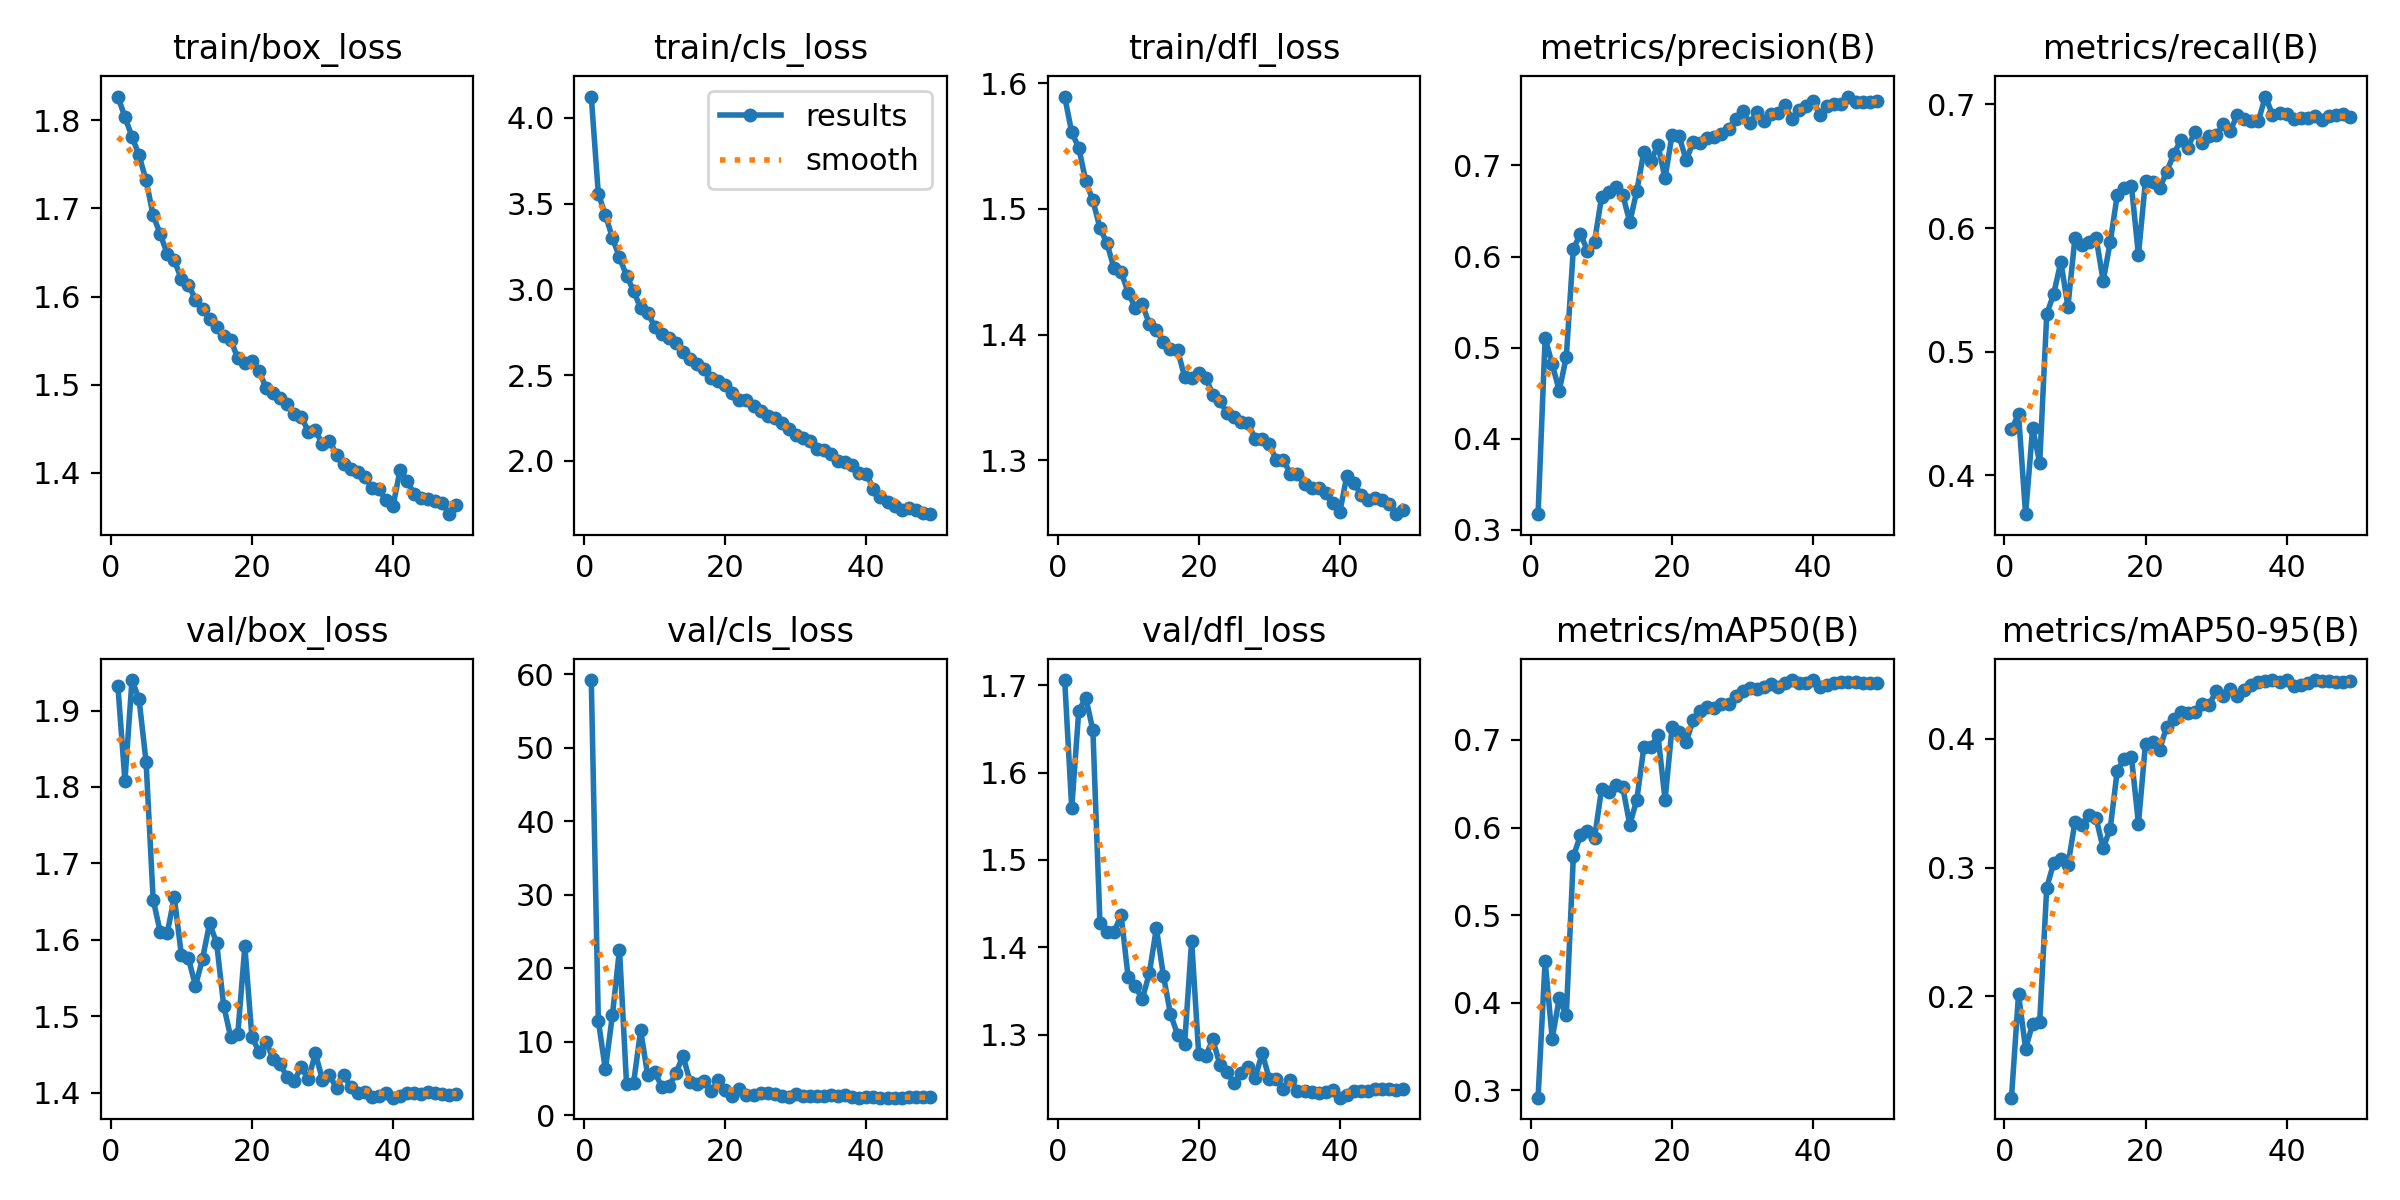

In [7]:
Image.open(f"runs/detect/train/results.png")

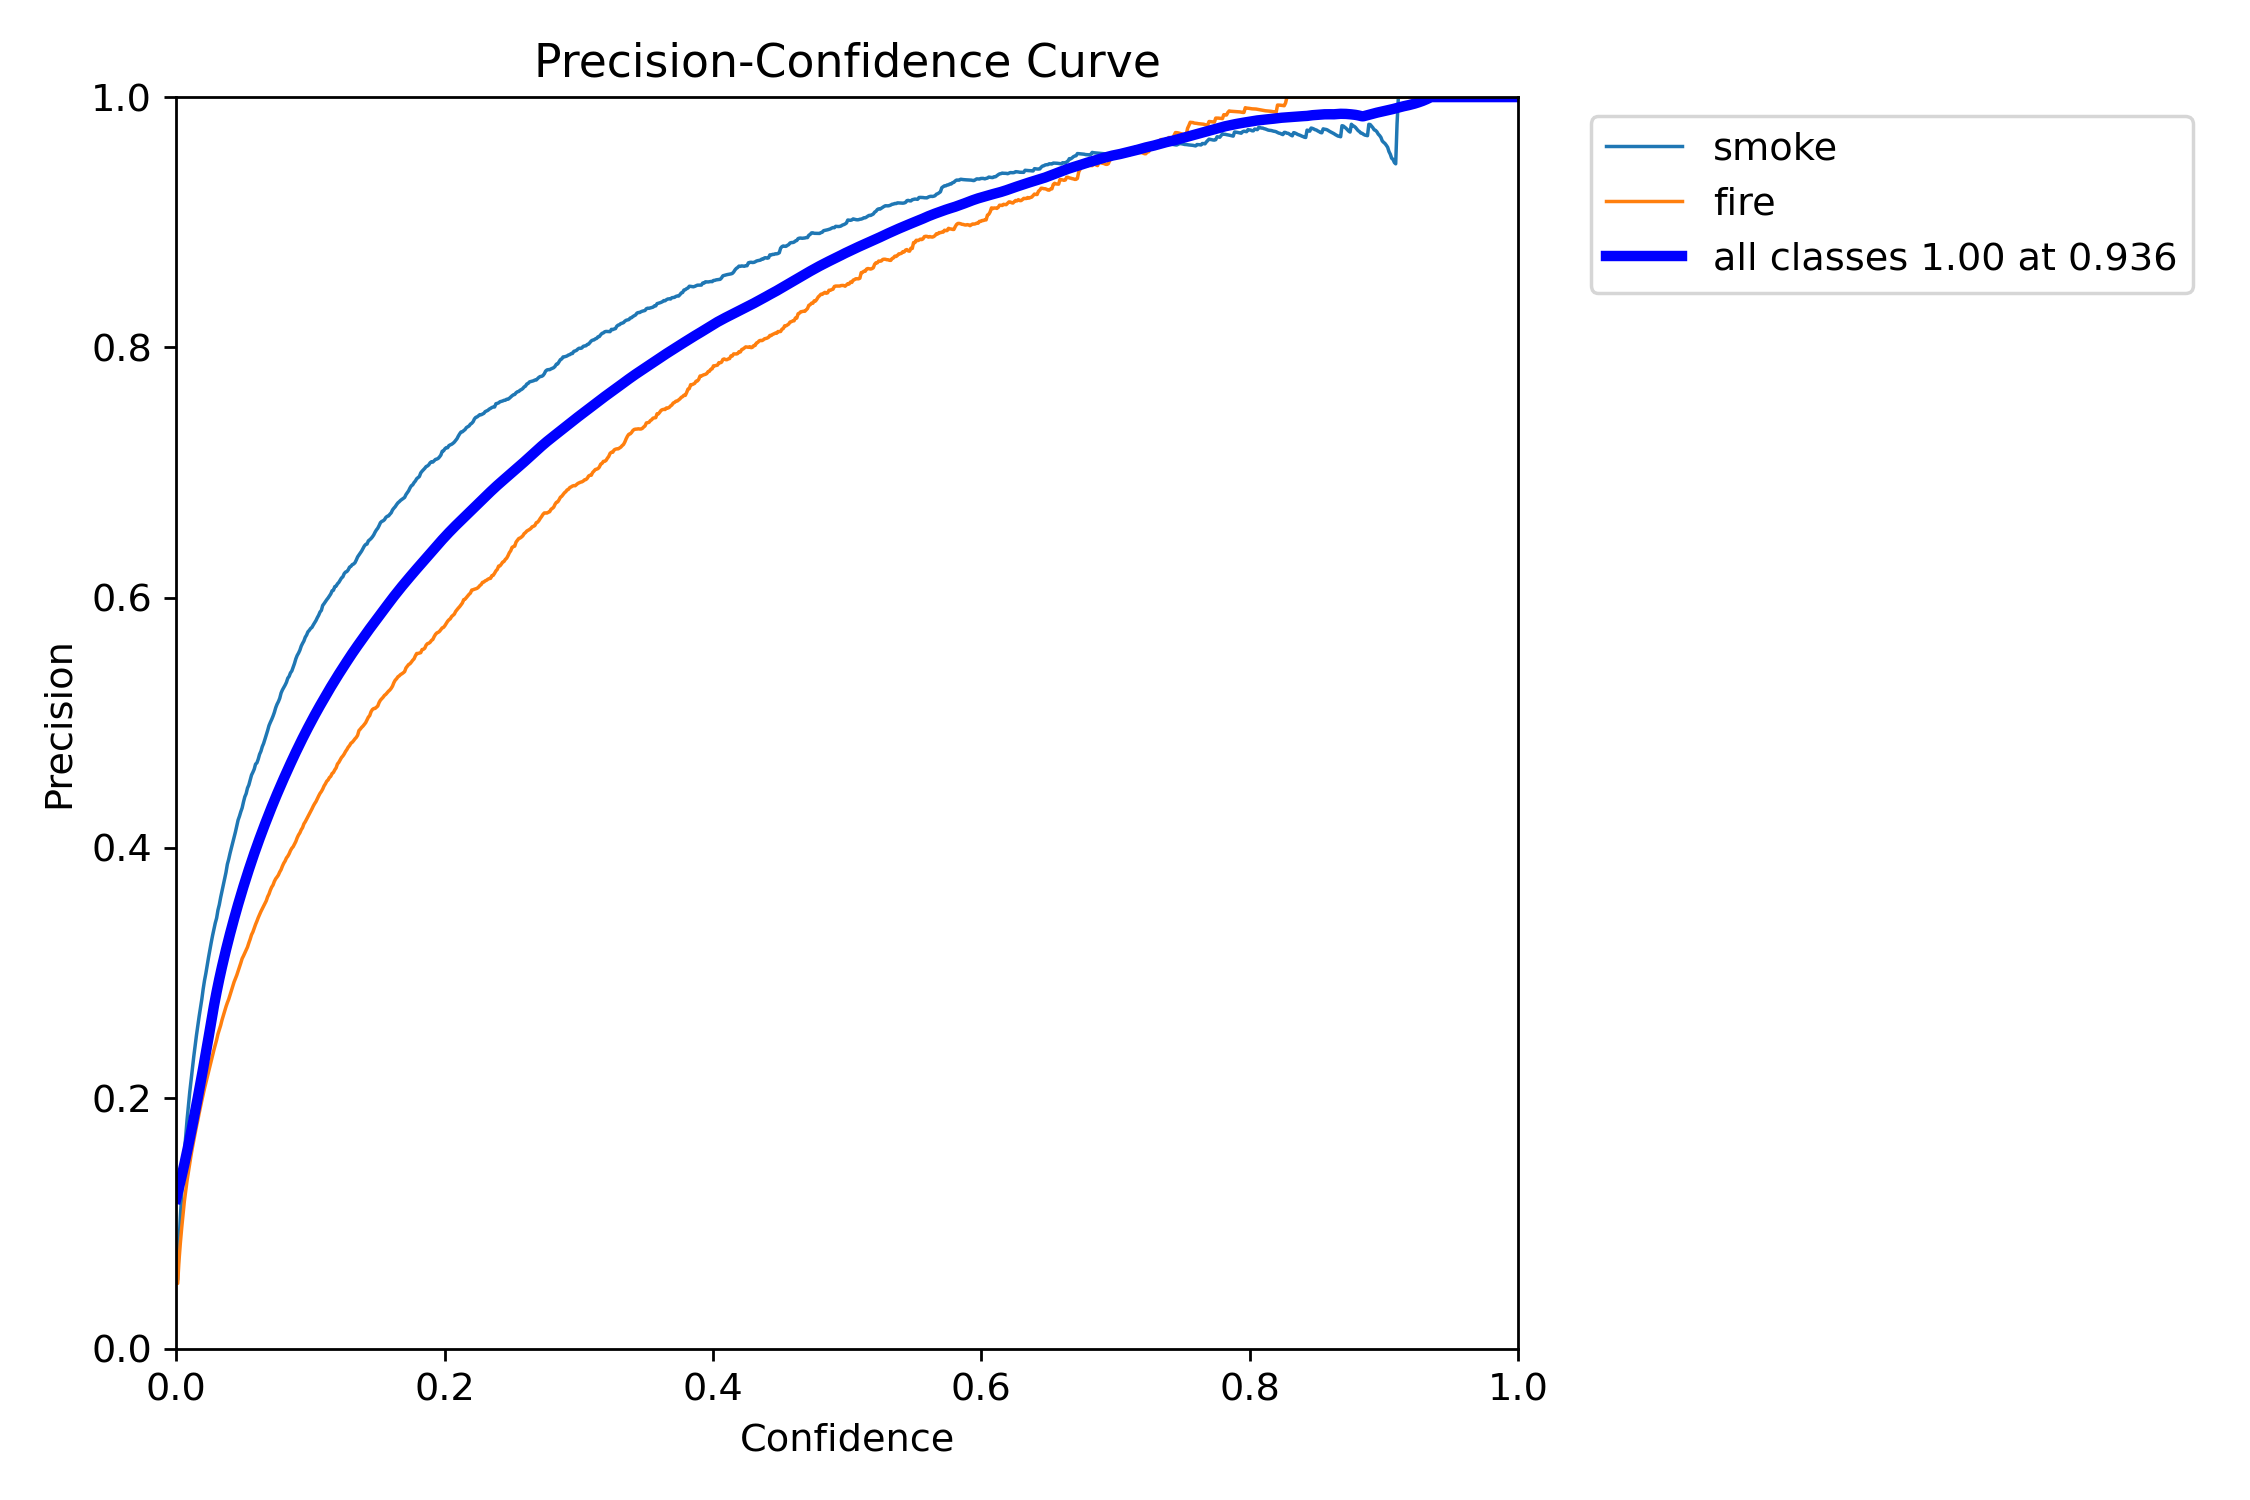

In [8]:
Image.open(f"runs/detect/train/P_curve.png")

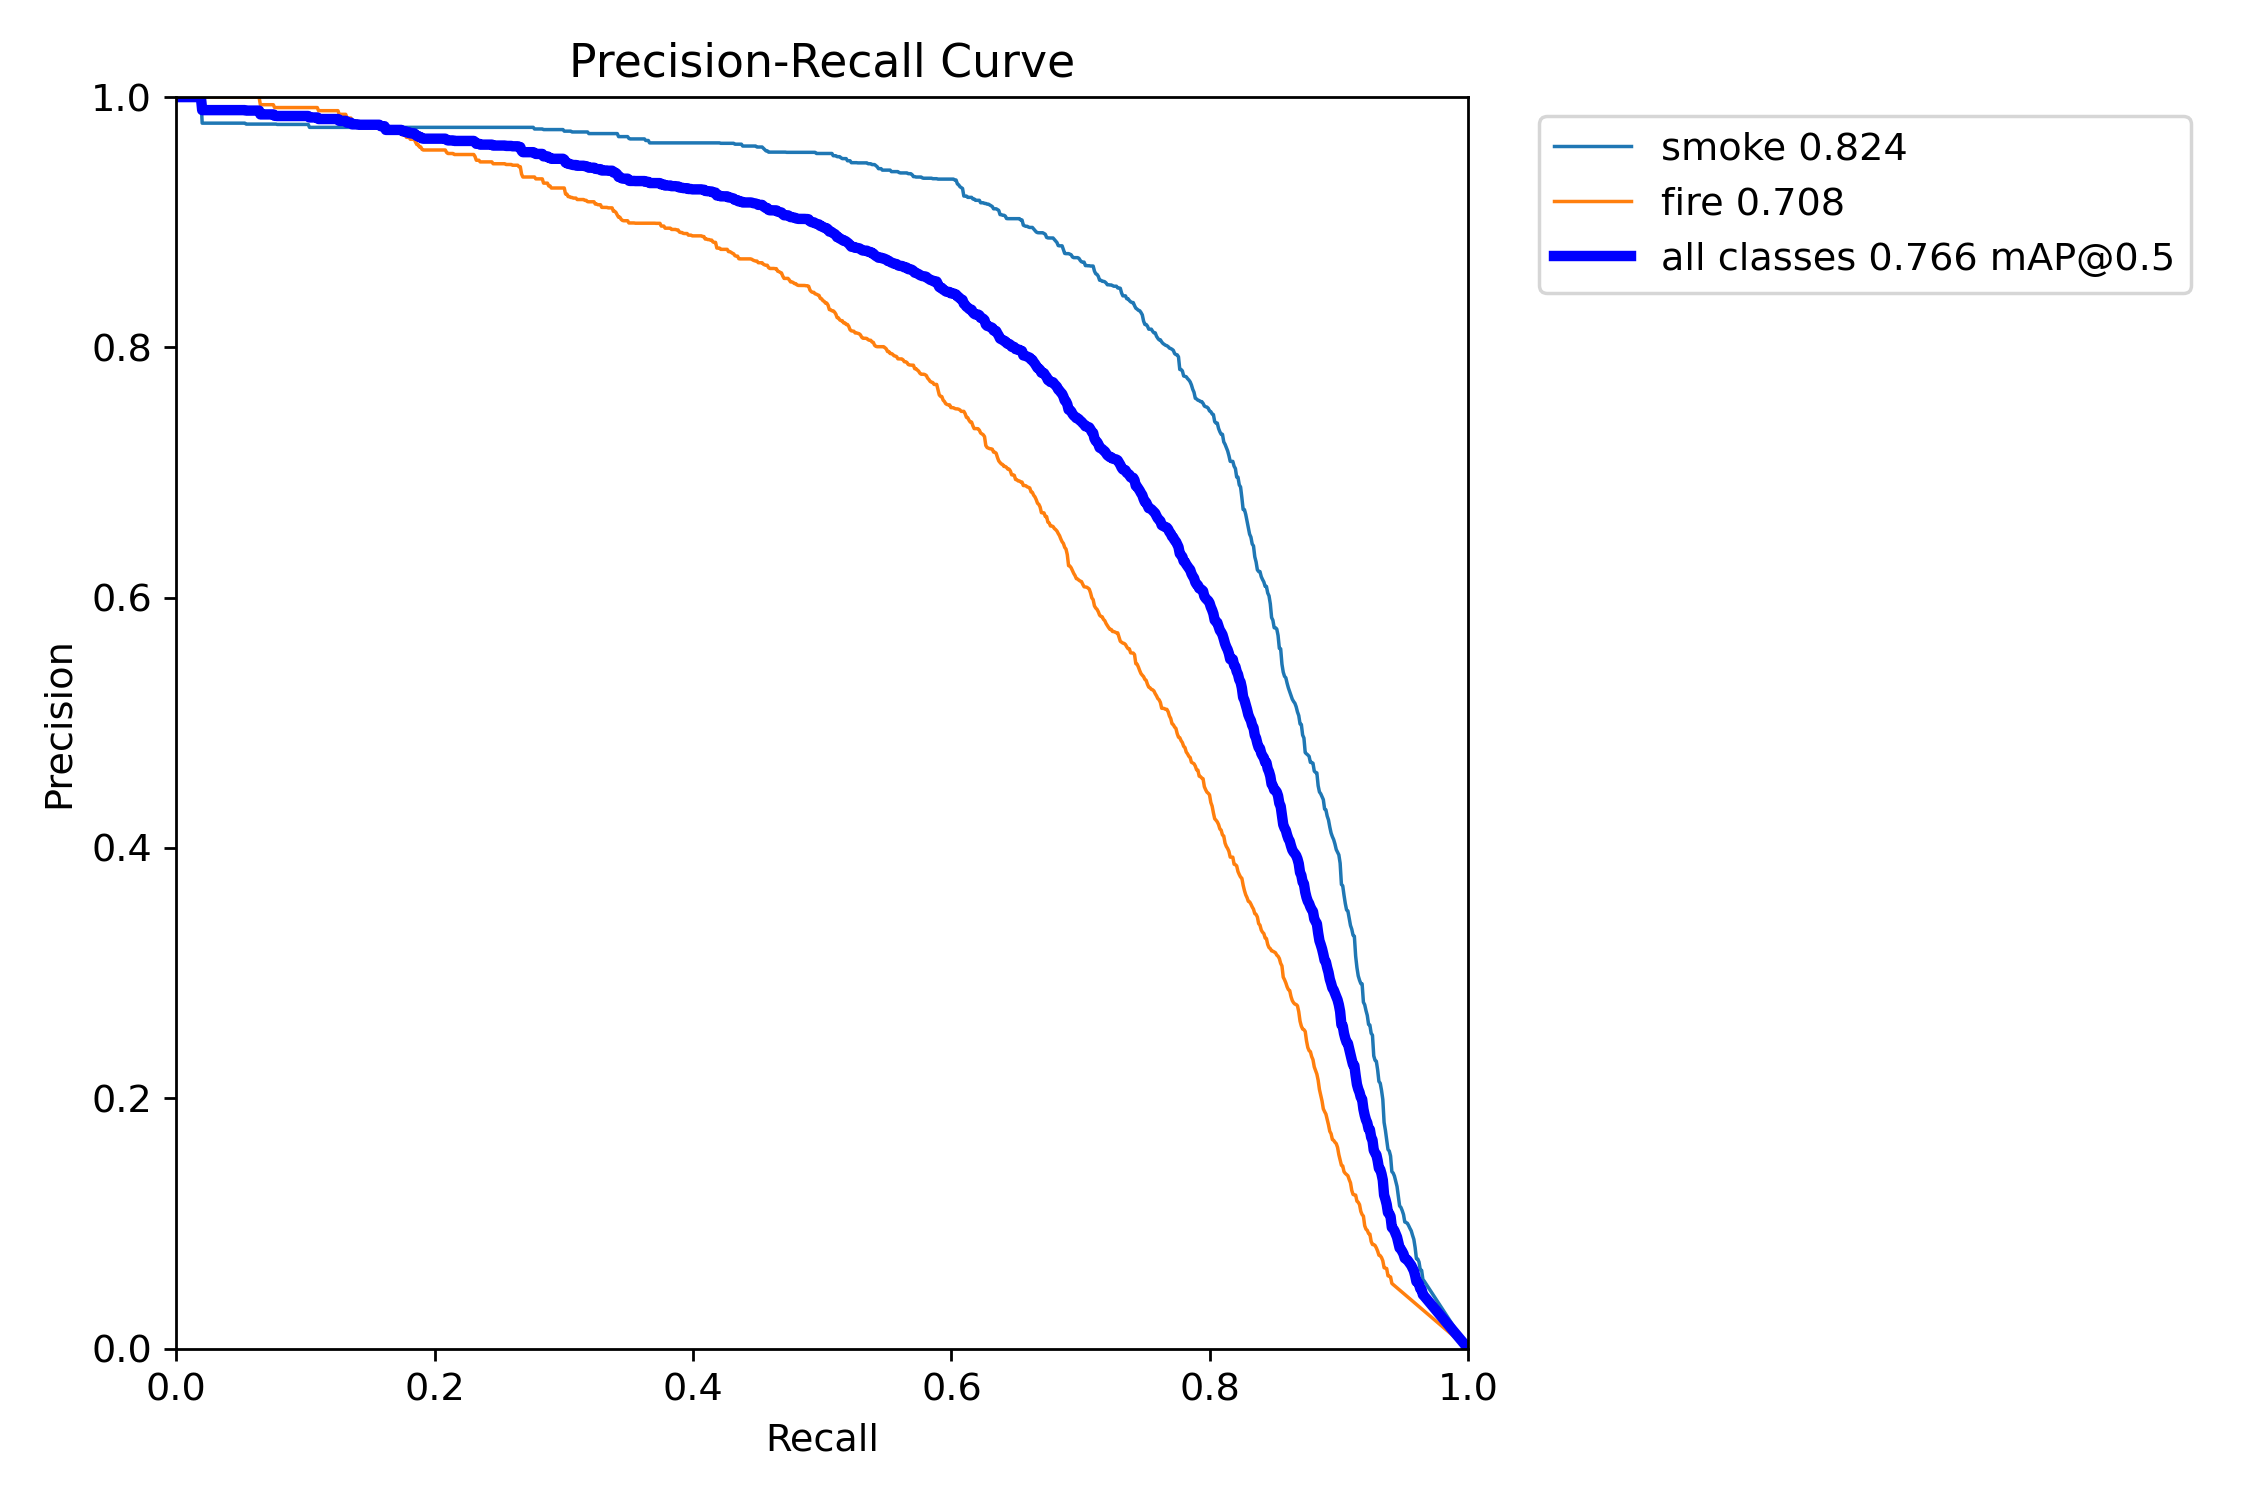

In [9]:
Image.open(f"runs/detect/train/PR_curve.png")